In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [98]:
# load datasets
data = {'MOOC': torch.load("data/act-mooc/graph.pt"), 
        'Junyi': torch.load("data/junyi/graph.pt")}

In [105]:
mooc = data['MOOC']

In [106]:
# Sample 5 users
user_ids = torch.randperm(mooc['user']['node_id'].size(0))[:5]

In [107]:
mask = torch.isin(mooc['user', 'accesses', 'resource'].edge_index[0], user_ids)
edge_index_filtered = mooc['user', 'accesses', 'resource'].edge_index[:, mask]
timestamps = mooc['user', 'accesses', 'resource'].time[mask]
labels = mooc['user', 'accesses', 'resource'].edge_y[mask]

In [108]:
B = nx.Graph()

for (u, r), ts, dropout in zip(edge_index_filtered.T, timestamps, labels):
    B.add_edge(f"user{u.item()}", f"timestamp{ts.item()}", color = ("red" if dropout else "black"))
    B.add_edge(f"resource{r.item()}", f"timestamp{ts.item()}", color = ("red" if dropout else "black"))

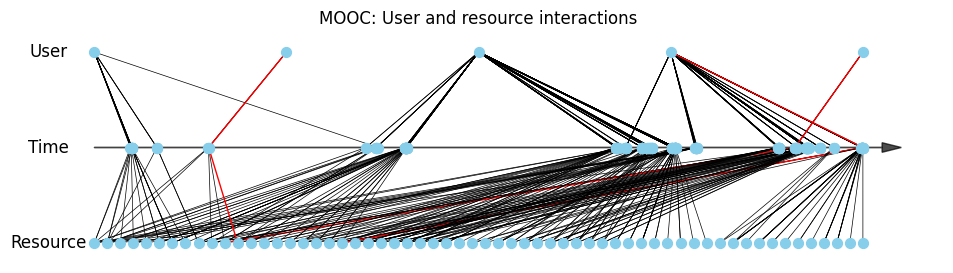

In [137]:
# Extract nodes by type
user_nodes = [node for node in B.nodes() if "user" in node]
resource_nodes = [node for node in B.nodes() if "resource" in node]
timestamp_nodes = [node for node in B.nodes() if "timestamp" in node]

# Set positions
pos = {}
max_time = timestamps.max().item()
for ts in timestamp_nodes:
    pos[ts] = (float(ts.replace("timestamp", "")) / max_time, 0.5)

for idx, user in enumerate(user_nodes):
    pos[user] = (idx / (len(user_nodes)-1), 1)

for idx, resource in enumerate(resource_nodes):
    pos[resource] = (idx / (len(resource_nodes) - 1), 0)

# Draw the graph
plt.figure(figsize=(12, 3))
plt.tight_layout()
edge_colors = [B[u][v]['color'] for u, v in B.edges()]
edge_width = [1 if B[u][v]['color'] == "red" else 0.5 for u, v in B.edges()]
plt.arrow(0, 0.5, 1.025, 0, head_width=0.05, head_length=0.025, fc='black', ec='black', linestyle='-', alpha=0.7)
nx.draw(B, pos, with_labels=False, node_size=50, node_color="skyblue", edge_color=edge_colors, width=edge_width)


plt.title("MOOC: User and resource interactions")
plt.text(-0.06, 0.975, "User", fontsize=12, ha='center')
plt.text(-0.06, 0.475, "Time", fontsize=12, ha='center')
plt.text(-0.06, -0.025, "Resource", fontsize=12, ha='center')
plt.savefig("figures/visualization.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
